<a href="https://colab.research.google.com/github/xinyang4O4/MAT421/blob/main/ModuleF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 20.1 Numerical Differentiation Problem Statement

Numerucal grid - evenly spaced set of points over the domain of a function over some interval. (could be negative)

Spacing/Step size - the distance between adjacent points on the grid.

This is useful is science area since most data collected are discrete (which we only know a few points). We can approximate the value using grids.

# 20.2 Finite Difference Approximating Derivatives

forward difference - to estimate the slope of the function at $x_j$ using the line that connects $(x_j,f(x_j))$ and $(x_{j+1},f(x_{j+1}))$: $f'(x_j) = \frac{f(x_{j+1})-f(x_j)}{x_{j+1}-x_j}$.

backward difference - to estimate the slope of the function at $x_j$ using the line that connects $(x_j,f(x_j))$ and $(x_{j-1},f(x_{j-1}))$: $f'(x_j) = \frac{f(x_{j-1})-f(x_j)}{x_{j-1}-x_j}$.

central difference - to estimate the slope of the function at $x_j$ using the line that connects $(x_{j-1},f(x_{j-1}))$ and $(x_{j+1},f(x_{j+1}))$: $f'(x_j) = \frac{f(x_{j+1})-f(x_{j-1})}{x_{j+1}-x_{j-1}}$.

forward difference formula - $f'(x_j)\approx\frac{f(x_{j+1})-f(x_j)}{h}$

backward difference formula - $f'(x_j)\approx\frac{f(x_{j})-f(x_{j-1})}{h}$

forward difference formula - $f'(x_j)\approx\frac{f(x_{j+1})-f(x_{j-1})}{2h}$

The error of all above formula is O(h)

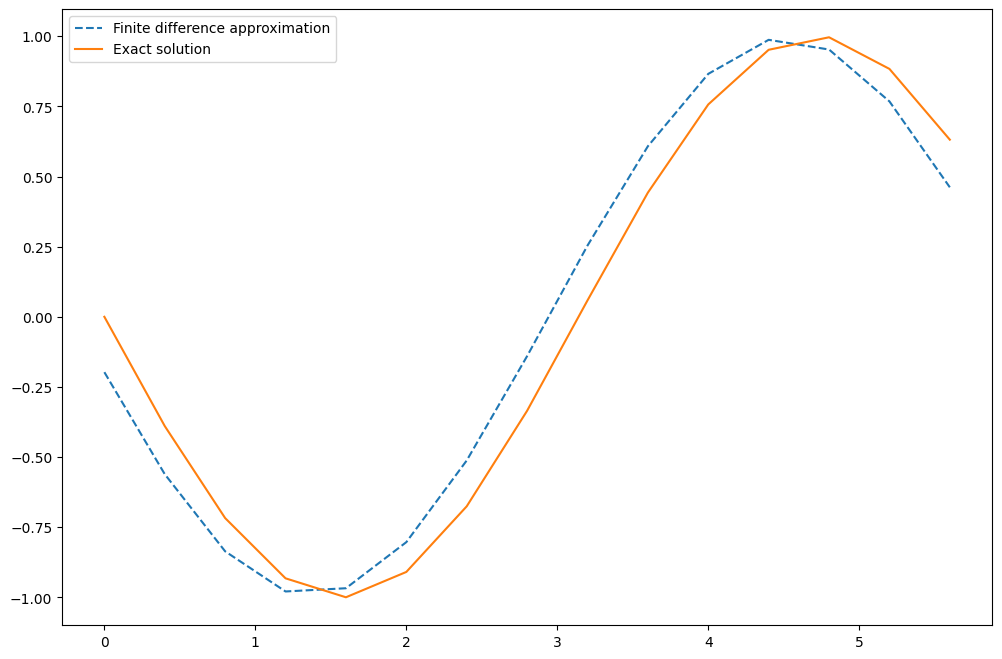

0.19734751499278724


In [4]:
#Approximate the solution using forward differences
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# step size
h = 0.4
# define grid
x = np.arange(0, 2*np.pi, h)
# compute function
y = np.cos(x)

# compute vector of forward differences
forward_diff = np.diff(y)/h
# compute corresponding grid
x_diff = x[:-1:]
# compute exact solution
exact_solution = -np.sin(x_diff)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x_diff, forward_diff, '--', \
         label = 'Finite difference approximation')
plt.plot(x_diff, exact_solution, \
         label = 'Exact solution')
plt.legend()
plt.show()

# Compute max error between
# numerical derivative and exact solution
max_error = max(abs(exact_solution - forward_diff))
print(max_error)

# 20.3 Approximating of Higher Order Derivatives

We can also use Taylor series to approximate higher order derivatives.

Since by Taylor series

$f(x_{j+1}) + f(x_{j-1}) = 2f(x_j)+h^2f''(x_j)+\frac{h^4f''''(x_j)}{24}+...$

then

$𝑓″(𝑥_𝑗)≈\frac{𝑓(𝑥_𝑗+1)−2𝑓(𝑥_𝑗)+𝑓(𝑥_𝑗−1)}{ℎ^2}$, and is $O(h^2)$.

# 20.4 Numerical Differentiation with Noise

noise - The value contaminated with noise means its value is off by a small amount from what is would be if it were computed from a pure mathematical function. (Often exists in engeering)

Example: The function cos(x) with a small noise with sin(x) wave. Then the function would be f(x) = cos(x) and $f_{ϵ,ω}(x) = cos(x)+ϵsin(ωx)$ where $0<ω≪1$ is a really small number and $ω$ is a large number

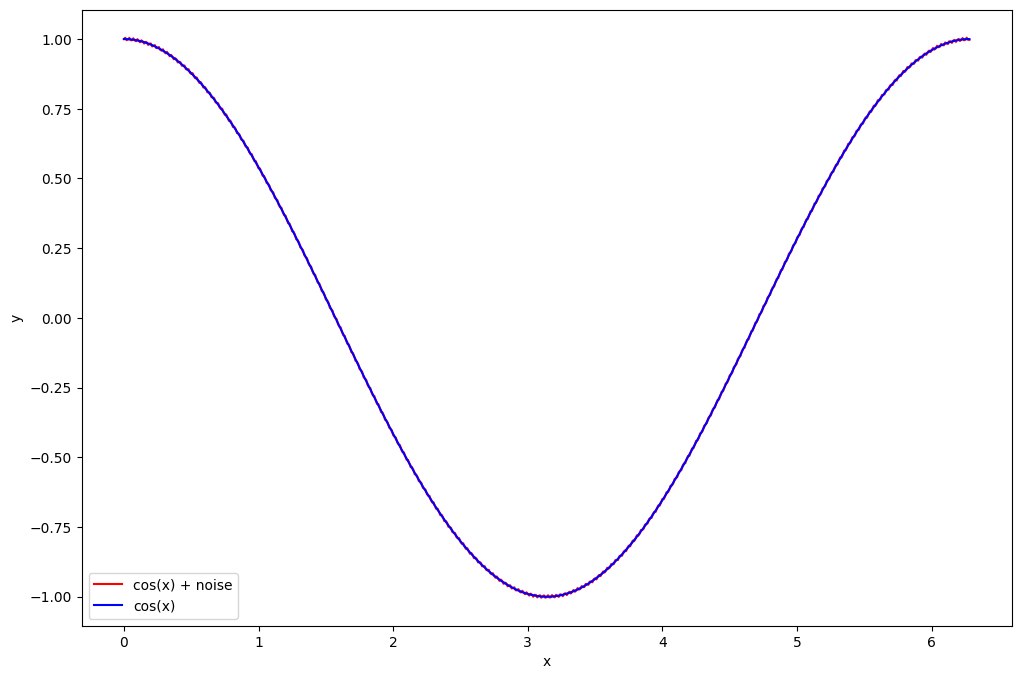

In [10]:
#shows the graph of the precise function and the function with noise
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(0, 2*np.pi, 0.01)
# compute function
omega = 200
epsilon = 0.005

y = np.cos(x)
y_noise = y + epsilon*np.sin(omega*x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', \
         label = 'cos(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'cos(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

The derivative of the presice function is $f'(x) = -sin(x)$ and the derivative of the function with noise is $f'_{ϵ,ω}(x) = -sin(x) + ϵωcos(ωx)$

We can see that the noise is affecting more after taken derivatives.

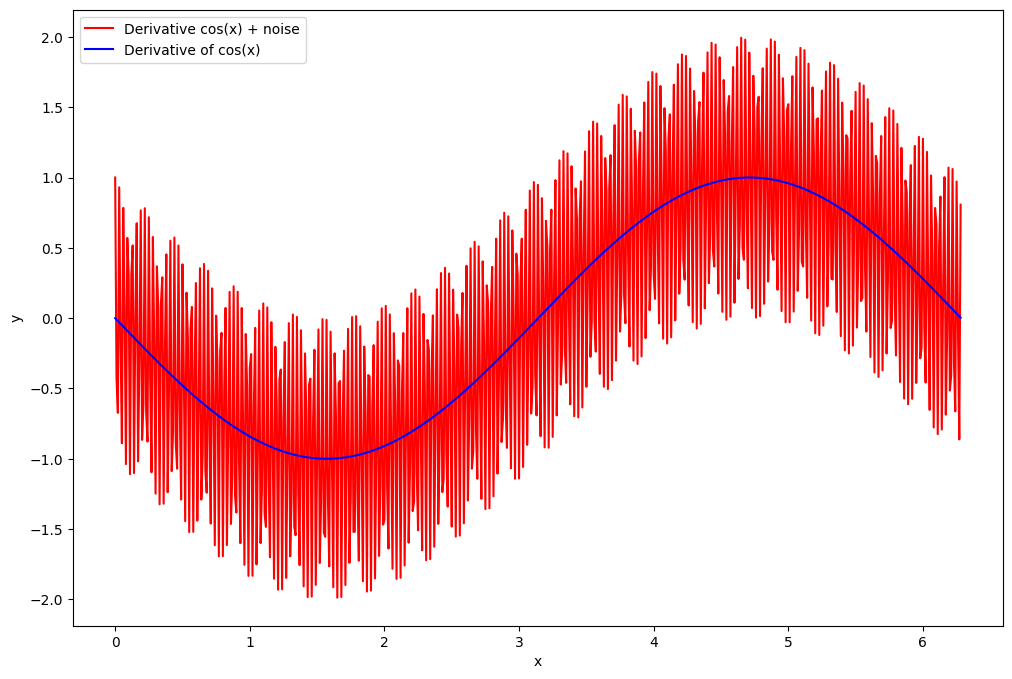

In [11]:
#shows the function after derivative with eps = 0.05 and omega = 200
x = np.arange(0, 2*np.pi, 0.01)
# compute function
y = -np.sin(x)
y_noise = y + epsilon*omega*np.cos(omega*x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', \
         label = 'Derivative cos(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'Derivative of cos(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()